In [2]:
!git clone https://github.com/pjreddie/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5955, done.
remote: Total 5955 (delta 0), reused 0 (delta 0), pack-reused 5955
Receiving objects: 100% (5955/5955), 6.37 MiB | 5.47 MiB/s, done.
Resolving deltas: 100% (3931/3931), done.


In [8]:
!make

make: *** No targets specified and no makefile found.  Stop.


In [9]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2024-07-19 08:16:38--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  54.3MB/s    in 4.4s    

2024-07-19 08:16:42 (53.7 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [10]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

/bin/bash: line 1: ./darknet: Is a directory


In [11]:
ls

darknet/  YOLOv3.ipynb  yolov3.weights


In [ ]:
import cv2
import matplotlib.pyplot as plt

def show(path):
  img = cv2.imread(path)
  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

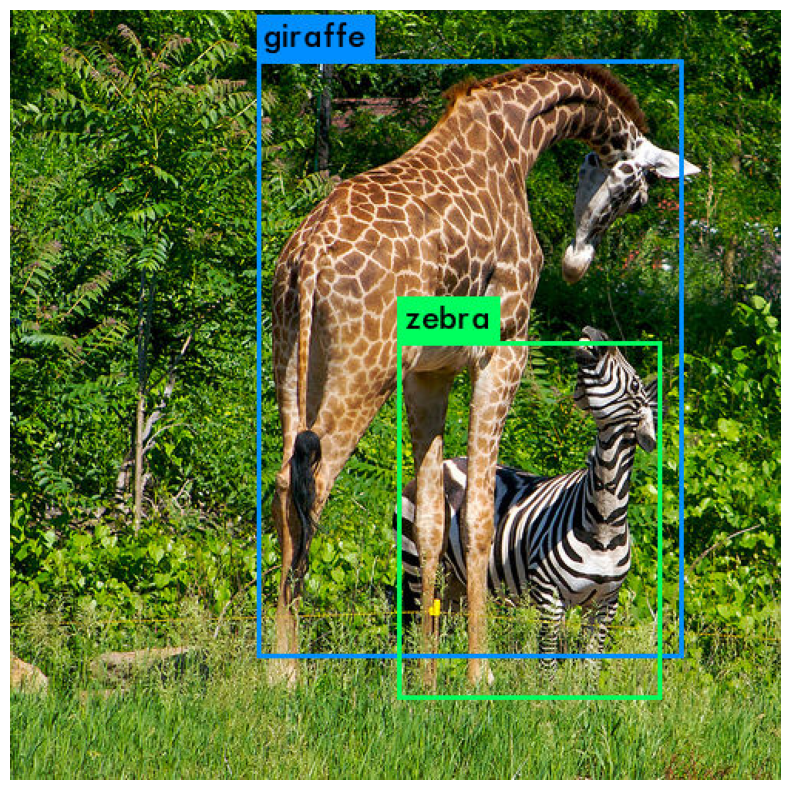

In [ ]:
show('predictions.jpg')

In [ ]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [ ]:
!make

gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -DCUDNN  -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -c ./src/gemm.c -o obj/gemm.o
Package opencv was not found in the pkg-config search path.
Perhaps you should add the directory containing `opencv.pc'
to the PKG_CONFIG_PATH environment variable
Package 'opencv', required by 'virtual:world', not found
./src/gemm.c: In function ‘time_gpu’:
./src/gemm.c:232:9: warning: ‘cudaThreadSynchronize’ is deprecated []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wdeprecated-declarations-Wdeprecated-declarations]8;;]
  232 |         cudaThreadSynchronize();
      |         ^~~~~~~~~~~~~~~~~~~~~
In file included from /usr/local/cuda/include/cuda_runtime.h:95,
                 from include/darknet.h:11,
                 from ./src/utils.h:5,
                 from ./src/gemm.c:2:
/usr/local/cuda/include/cuda_runtime_api.h:1069:57: n

In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/eagle.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

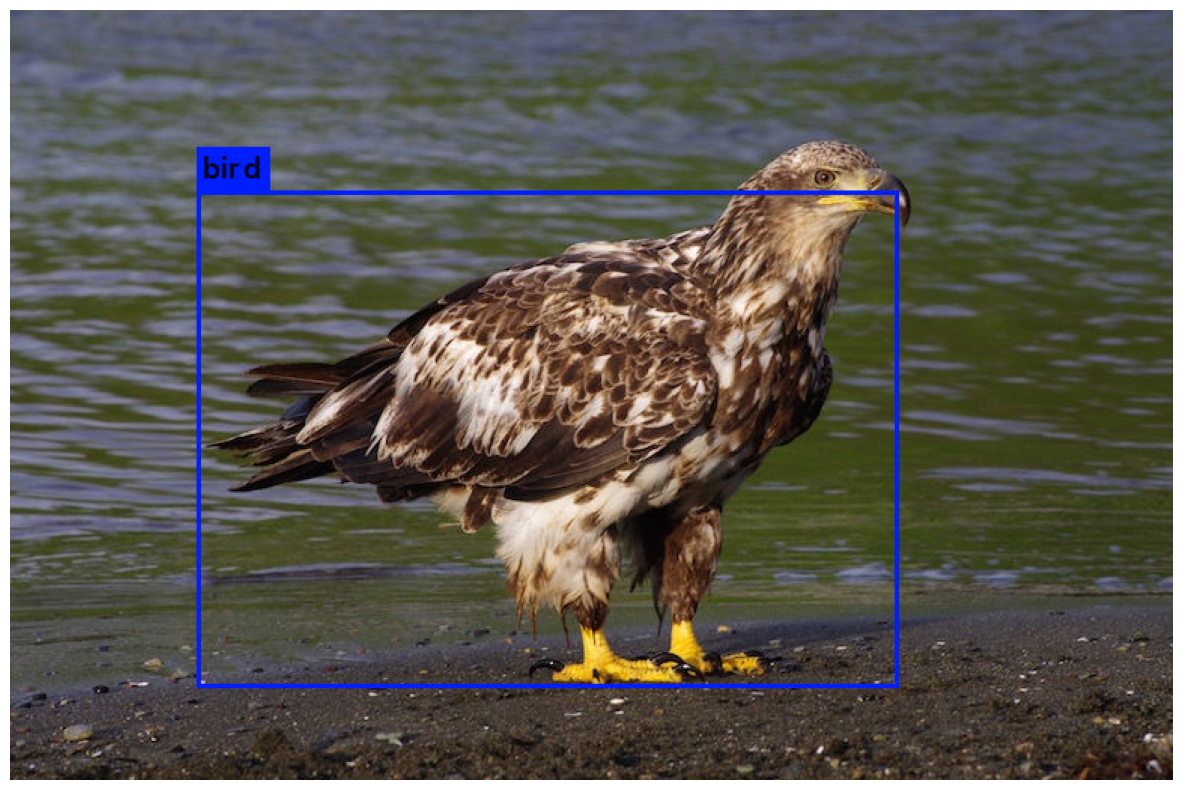

In [ ]:
show("predictions.jpg")

In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/horses.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

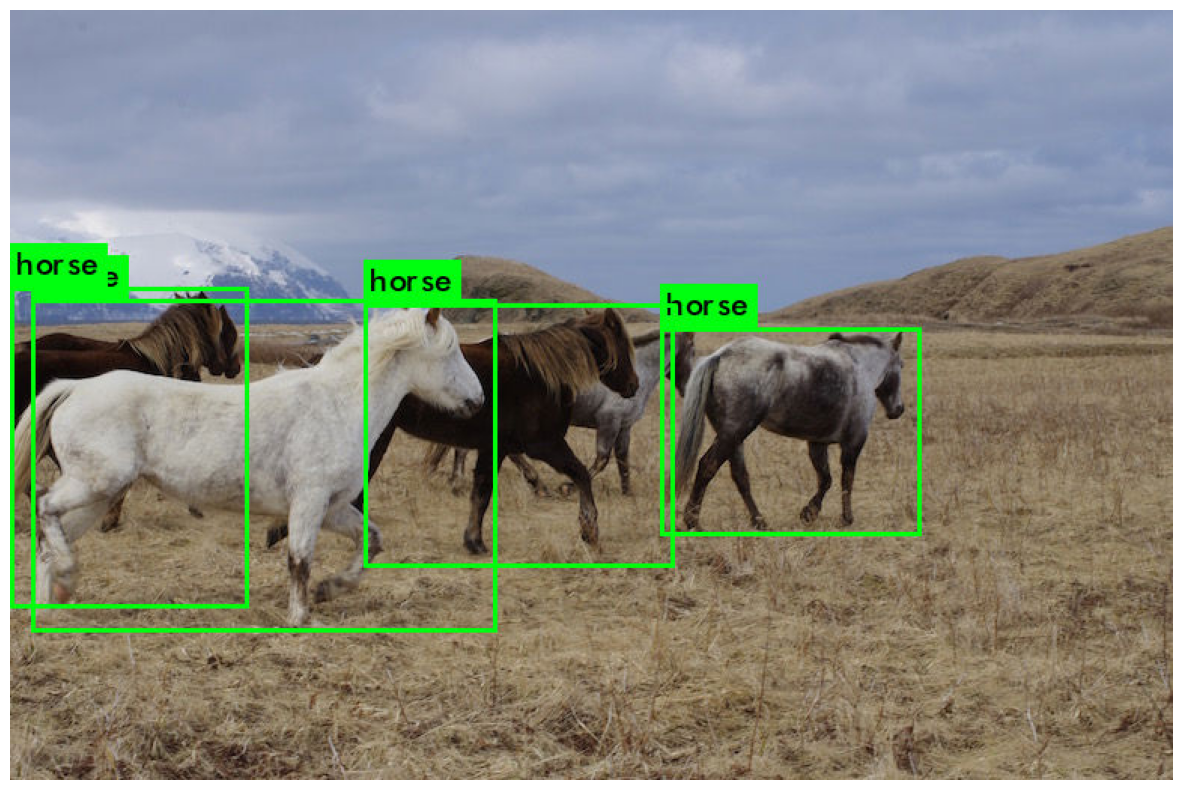

In [ ]:
show("predictions.jpg")

In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/horses.jpg -thresh 0.9

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

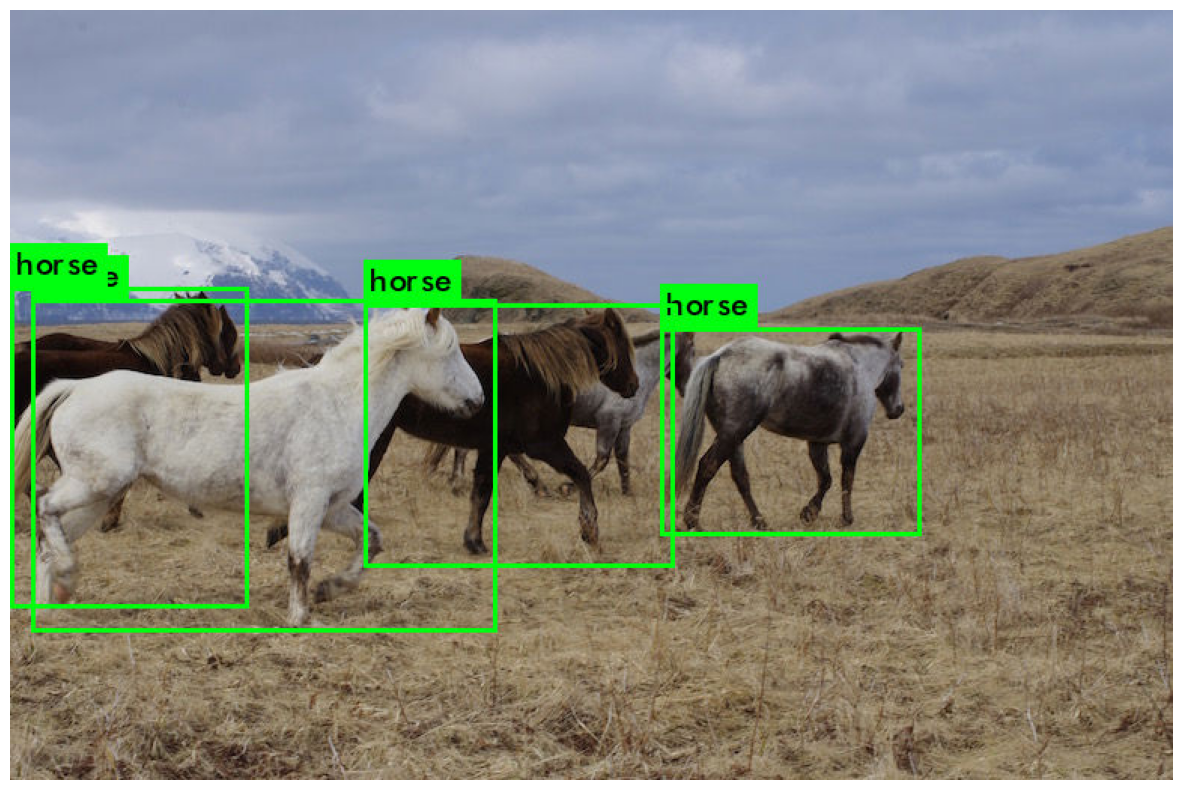

In [ ]:
show("predictions.jpg")

In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/scream.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

In [ ]:
!wget https://pjreddie.com/media/files/yolo9000.weights

--2024-07-18 07:24:22--  https://pjreddie.com/media/files/yolo9000.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195230020 (186M) [application/octet-stream]
Saving to: ‘yolo9000.weights’

yolo9000.weights    100%[===================>] 186.19M  42.2MB/s    in 4.5s    

2024-07-18 07:24:26 (41.8 MB/s) - ‘yolo9000.weights’ saved [195230020/195230020]



In [ ]:
!./darknet detect cfg/yolo9000.cfg yolo9000.weights data/dog.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   544 x 544 x   3   ->   544 x 544 x  32  0.511 BFLOPs
    1 max          2 x 2 / 2   544 x 544 x  32   ->   272 x 272 x  32
    2 conv     64  3 x 3 / 1   272 x 272 x  32   ->   272 x 272 x  64  2.727 BFLOPs
    3 max          2 x 2 / 2   272 x 272 x  64   ->   136 x 136 x  64
    4 conv    128  3 x 3 / 1   136 x 136 x  64   ->   136 x 136 x 128  2.727 BFLOPs
    5 conv     64  1 x 1 / 1   136 x 136 x 128   ->   136 x 136 x  64  0.303 BFLOPs
    6 conv    128  3 x 3 / 1   136 x 136 x  64   ->   136 x 136 x 128  2.727 BFLOPs
    7 max          2 x 2 / 2   136 x 136 x 128   ->    68 x  68 x 128
    8 conv    256  3 x 3 / 1    68 x  68 x 128   ->    68 x  68 x 256  2.727 BFLOPs
    9 conv    128  1 x 1 / 1    68 x  68 x 256   ->    68 x  68 x 128  0.303 BFLOPs
   10 conv    256  3 x 3 / 1    68 x  68 x 128   ->    68 x  68 x 256  2.727 BFLOPs
   11 max          2 x 2 / 2    68 x  68 x 256   ->